<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" style="width:400px;height:200px;">
<h1 color="blue">Random Forest</h1>

Random Forest is known for its robustness, versatility, and resistance to overfitting. It is widely used in various applications, including classification, regression, feature selection, and even anomaly detection. It is considered one of the go-to algorithms for many machine learning tasks due to its effectiveness and ease of use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[23]

array([ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8.,
       12., 12.,  0.,  0.,  0.,  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,
        0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8.,
       14., 15.,  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.])

In [10]:
digits.feature_names[23]

'pixel_2_7'

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 640x480 with 0 Axes>

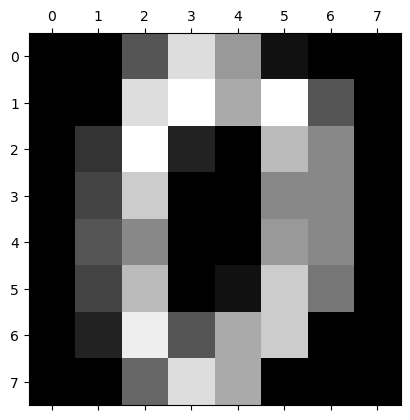

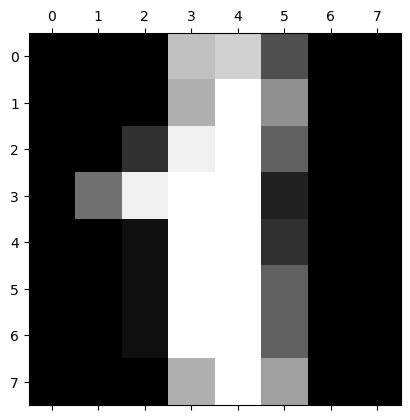

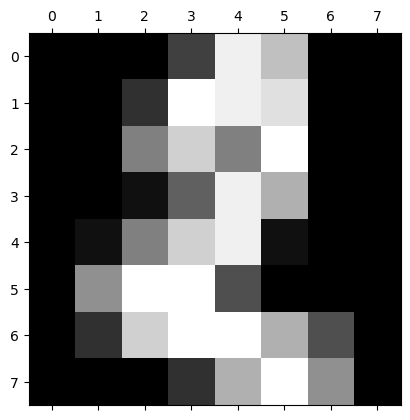

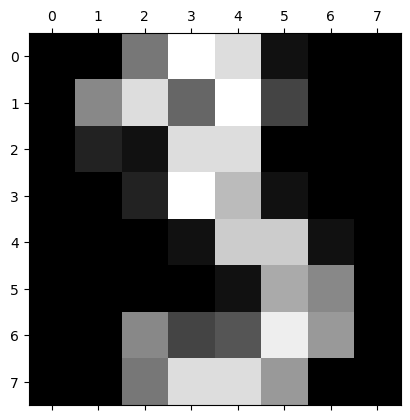

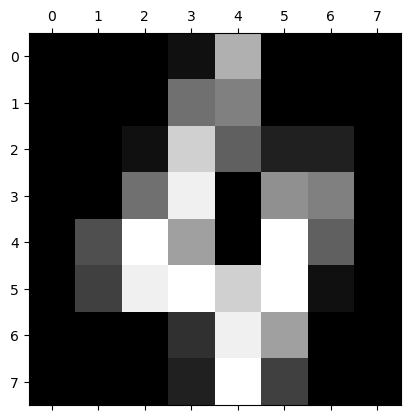

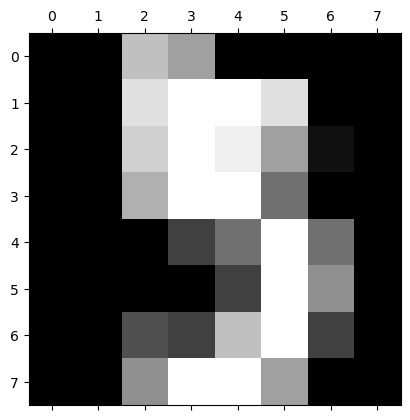

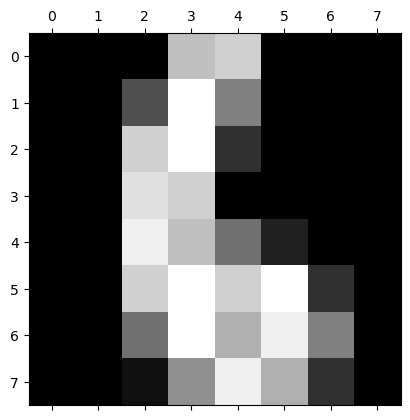

In [30]:
%matplotlib inline
plt.gray()
for i in range(7):
    plt.matshow(digits.images[i])

In [14]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

In [18]:
len(X_train)

1257

In [19]:
len(X_test)

540

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [32]:
model.score(X_test,y_test)

0.975925925925926

In [33]:
model.predict(X_test)

array([5, 1, 7, 2, 5, 9, 1, 1, 5, 5, 5, 2, 3, 6, 2, 3, 4, 7, 1, 6, 5, 2,
       6, 9, 1, 0, 5, 0, 7, 6, 8, 6, 3, 8, 0, 9, 1, 6, 4, 9, 4, 7, 1, 0,
       0, 7, 4, 9, 5, 1, 3, 7, 7, 9, 5, 4, 9, 8, 6, 0, 4, 0, 7, 4, 2, 1,
       4, 6, 7, 7, 3, 9, 8, 3, 8, 8, 7, 6, 6, 6, 8, 4, 7, 5, 4, 9, 4, 1,
       9, 4, 1, 2, 5, 3, 9, 9, 3, 8, 9, 4, 8, 1, 4, 1, 5, 5, 2, 0, 2, 2,
       8, 2, 5, 6, 7, 0, 6, 0, 5, 5, 2, 2, 6, 8, 2, 8, 7, 2, 3, 6, 2, 2,
       1, 2, 1, 3, 1, 4, 3, 6, 6, 7, 2, 3, 5, 8, 7, 1, 0, 9, 1, 8, 9, 8,
       5, 6, 2, 6, 4, 5, 8, 5, 8, 2, 4, 4, 8, 2, 7, 4, 9, 6, 5, 9, 9, 8,
       7, 6, 2, 8, 4, 4, 2, 9, 8, 8, 1, 2, 7, 1, 8, 6, 7, 4, 1, 4, 1, 8,
       1, 6, 3, 6, 0, 8, 3, 9, 6, 8, 2, 9, 3, 5, 8, 0, 4, 6, 4, 1, 9, 2,
       9, 9, 6, 2, 1, 5, 7, 4, 6, 6, 5, 1, 5, 1, 2, 1, 9, 5, 3, 4, 2, 8,
       3, 3, 5, 8, 3, 2, 0, 4, 4, 6, 6, 8, 8, 4, 6, 9, 6, 4, 9, 3, 8, 3,
       1, 6, 1, 1, 4, 9, 1, 6, 9, 6, 9, 6, 7, 0, 4, 9, 7, 7, 9, 8, 0, 2,
       5, 8, 5, 1, 0, 8, 4, 0, 7, 7, 0, 6, 5, 0, 5,

In [34]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 52,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  3, 60]], dtype=int64)

Text(0.5, 47.7222222222222, 'predicted')

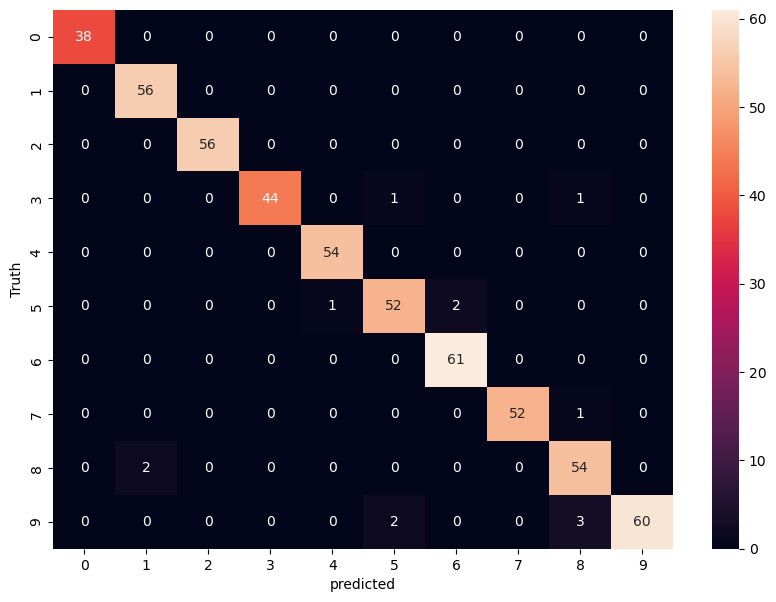

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.ylabel('Truth')
plt.xlabel('predicted')